In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = 'data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/mercor_visual_testing_model/

/content/drive/My Drive/Colab Notebooks/mercor_visual_testing_model


In [ ]:

import pandas as pd

In [ ]:
train_df0 = pd.read_excel('10kdataset.xlsx')
train_df0 = train_df0.drop(['background_color','text_color','border_color'],axis=1)
train_df0

,label,font_family,border_style,body_font_size,headline_font_size
0,Good,Netflix Sans,outset,15,24
1,Good,Product Sans,outset,15,21
2,Bad,Cabin,solid,9,12
3,Good,Montserrat,dashed,15,22
4,Good,Arial,groove,16,21
...,...,...,...,...,...
9995,Bad,Fira Sans,dashed,7,37
9996,Good,Netflix Sans,dashed,16,24
9997,Bad,Roboto Condensed,dotted,1,38
9998,Good,Netflix Sans,groove,13,22


In [ ]:
print(len(train_df0.border_style.unique()))
print(train_df0.border_style.unique())

10
['outset' 'solid' 'dashed' 'groove' 'inset' 'double' 'none' 'dotted'
 'hidden' 'ridge']


In [ ]:
font_family_dummies = pd.get_dummies(train_df0['font_family'])
border_style_dummies = pd.get_dummies(train_df0['border_style'])
train_df1 = train_df0.drop(['font_family','border_style'],axis=1)
train_df2 = pd.concat([train_df1,font_family_dummies,border_style_dummies],axis=1)
mapping = {'Good': 1, 'Bad': 0}
train_df2['label'] = train_df2['label'].map(mapping)
train_df2

,label,body_font_size,headline_font_size,Arial,Bitter,Cabin,Comfortaa,Courier New,Dosis,Exo,...,dashed,dotted,double,groove,hidden,inset,none,outset,ridge,solid
0,1,15,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,9,12,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,15,22,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,16,21,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,7,37,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,1,16,24,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,0,1,38,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9998,1,13,22,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df2)
scaled_train
multiplied_by = scaler.scale_[scaled_train.shape[1]-1]
added = scaler.min_[scaled_train.shape[1]-1]
print(multiplied_by)
print(added)

1.0
0.0


In [ ]:
scaled_train_df = pd.DataFrame(scaled_train, columns=train_df2.columns.values)
scaled_train_df

,label,body_font_size,headline_font_size,Arial,Bitter,Cabin,Comfortaa,Courier New,Dosis,Exo,...,dashed,dotted,double,groove,hidden,inset,none,outset,ridge,solid
0,1.0,0.583333,0.589744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.583333,0.512821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.333333,0.282051,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.583333,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.625000,0.512821,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.250000,0.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1.0,0.625000,0.589744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.000000,0.948718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1.0,0.500000,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
target = 'label'
X = scaled_train_df.drop(target, axis=1).values
Y = scaled_train_df[[target]].values

# Train the model
history = model.fit(
    X[10:9999],
    Y[10:9999],
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
313/313 - 5s - loss: 0.0930 - 5s/epoch - 16ms/step
Epoch 2/20
313/313 - 1s - loss: 0.0376 - 851ms/epoch - 3ms/step
Epoch 3/20
313/313 - 1s - loss: 0.0205 - 694ms/epoch - 2ms/step
Epoch 4/20
313/313 - 1s - loss: 0.0155 - 841ms/epoch - 3ms/step
Epoch 5/20
313/313 - 1s - loss: 0.0131 - 735ms/epoch - 2ms/step
Epoch 6/20
313/313 - 1s - loss: 0.0120 - 771ms/epoch - 2ms/step
Epoch 7/20
313/313 - 1s - loss: 0.0109 - 917ms/epoch - 3ms/step
Epoch 8/20
313/313 - 1s - loss: 0.0100 - 820ms/epoch - 3ms/step
Epoch 9/20
313/313 - 1s - loss: 0.0094 - 867ms/epoch - 3ms/step
Epoch 10/20
313/313 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 11/20
313/313 - 1s - loss: 0.0087 - 928ms/epoch - 3ms/step
Epoch 12/20
313/313 - 1s - loss: 0.0086 - 825ms/epoch - 3ms/step
Epoch 13/20
313/313 - 1s - loss: 0.0080 - 1s/epoch - 5ms/step
Epoch 14/20
313/313 - 1s - loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 15/20
313/313 - 1s - loss: 0.0073 - 698ms/epoch - 2ms/step
Epoch 16/20
313/313 - 1s - loss: 0.0075 - 705

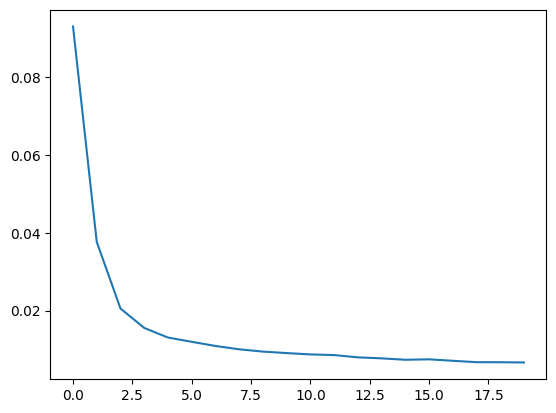

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
prediction = model.predict(X[0:1])
prediction

1/1 [==============================] - 0s 310ms/step


array([[0.89262176]], dtype=float32)

In [ ]:
train_df2.head()

,label,body_font_size,headline_font_size,Arial,Bitter,Cabin,Comfortaa,Courier New,Dosis,Exo,...,dashed,dotted,double,groove,hidden,inset,none,outset,ridge,solid
0,1,15,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,9,12,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,15,22,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,16,21,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
def classify(fontFamily,borderStyle,bodyFontSize,headlineFontSize):
  new_row = pd.Series(0, index=train_df2.columns)
  df = pd.DataFrame(columns=train_df2.columns)
  df = df.append(new_row, ignore_index=True)
  df = df.drop(['label'],axis=1)
  df['body_font_size'] = bodyFontSize
  df['headline_font_size'] = headlineFontSize
  df[fontFamily]=1
  df[borderStyle]=1
  scaled_train = scaler.fit_transform(df)
  scaled_train_df = pd.DataFrame(scaled_train, columns=df.columns.values)
  X = scaled_train_df.values
  prediction = model.predict(X[0:1])
  return prediction[0][0]

In [ ]:
classify("Arial","dotted",14,11)

1/1 [==============================] - 0s 22ms/step


<ipython-input-35-ee2f1fc2d3df>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


0.0015863106

In [ ]:
from flask import Flask,request, jsonify,make_response
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/classify",methods = ['GET'])
def home3():
  fontFamily,borderStyle,bodyFontSize,headlineFontSize = request.get_json()['fontFamily'],request.get_json()['borderStyle'],request.get_json()['bodyFontSize'],request.get_json()['headlineFontSize']
  res = classify(fontFamily,borderStyle,bodyFontSize,headlineFontSize)
  if res>0.5:
    return "The UI is VALID"
  else:
    return "The UI is INVALID"